In [262]:
import numpy as np
import pandas as pd
import seaborn as sns 


df = pd.read_csv('D:\DOWNLOADS\Iris Dataset.csv')
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [263]:
"""
Encoading the 'Species' column so that it can be plotted on heat map.
"""

def label_encoder(column):
    labels = column.unique()
    label_dict = {label: i for i, label in enumerate(labels)}
    encoded_column = column.map(label_dict)
    return encoded_column

# Encode the 'sex' column
data['Species'] = label_encoder(df['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,0
146,147,6.3,2.5,5.0,1.9,2,0
147,148,6.5,3.0,5.2,2.0,2,0
148,149,6.2,3.4,5.4,2.3,2,0


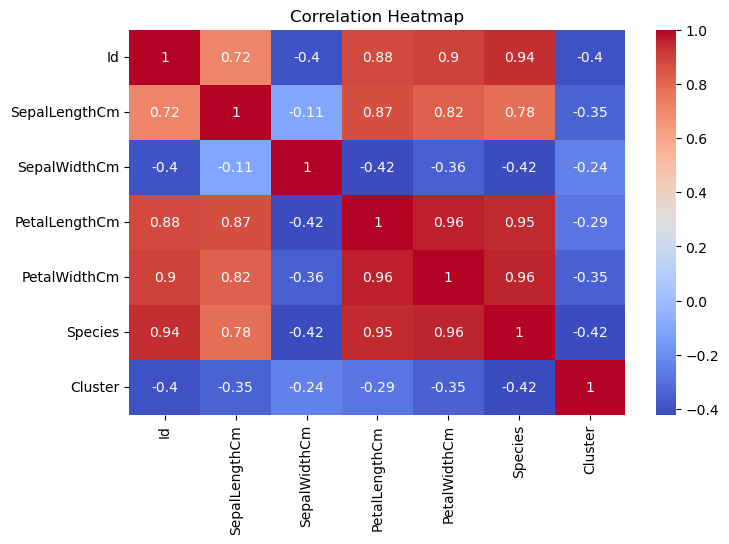

In [264]:
"""
The correlation heatmap provides a visual representation of the pairwise correlations between the numerical columns in the DataFrame.
It helps identify the strength and direction of relationships between variables

"""
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

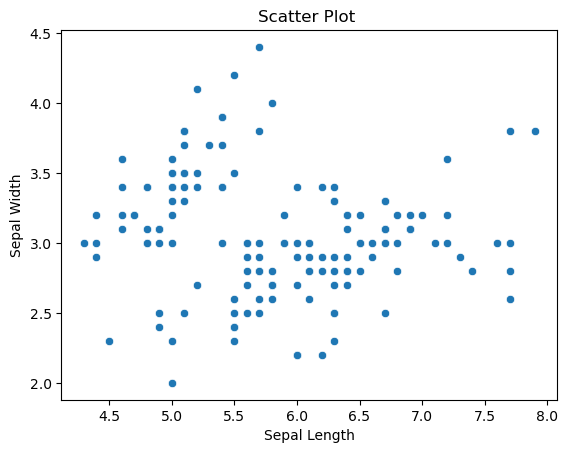

In [265]:
#df = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

y = df['Species']



sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot ')
plt.show()

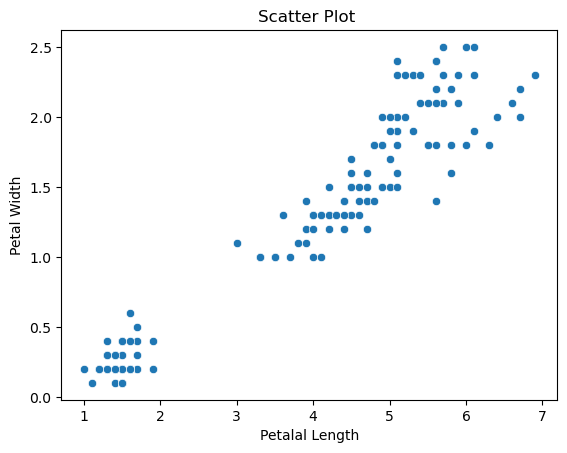

In [266]:


# Scatter plot 
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df)
plt.xlabel('Petalal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot ')
plt.show()

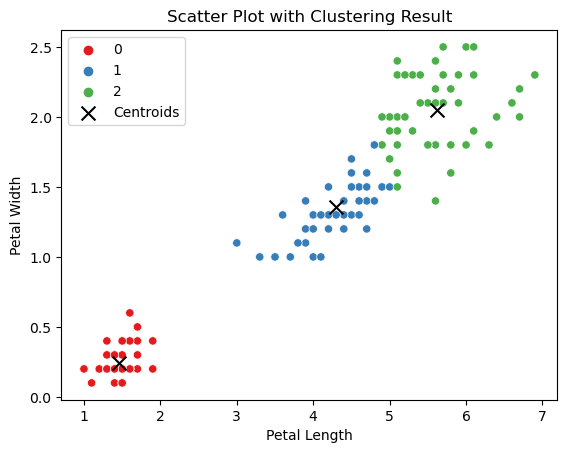

(None,
      Actual Species  Predicted Cluster
 0       Iris-setosa                  2
 1       Iris-setosa                  2
 2       Iris-setosa                  2
 3       Iris-setosa                  2
 4       Iris-setosa                  2
 ..              ...                ...
 145  Iris-virginica                  0
 146  Iris-virginica                  0
 147  Iris-virginica                  0
 148  Iris-virginica                  0
 149  Iris-virginica                  0
 
 [150 rows x 2 columns])

In [268]:
"""
The Correalation heat map shows that, the Species is more correlated with the propeties of
its Petals and lesser correlated with Sepal.

Hence, we will be applying k-mean clustering on Petals.

"""

#initializing the centroids randomly  for stating the clustering.
def initialize_centroids(data, k):
    # Randomly initialize centroids by selecting k data points from the dataset
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    # Assign each data point to the closest centroid
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    return labels

def update_centroids(data, labels, k):
    # Update the centroids by calculating the mean of the assigned data points
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

#defining the K-means cluster function
def kmeans(data, k, num_iterations):
    # Initialize centroids
    centroids = initialize_centroids(data, k)

    # Perform k-means iterations
    for _ in range(num_iterations):
        # Assign clusters to data points
        labels = assign_clusters(data, centroids)

        # Update centroids
        centroids = update_centroids(data, labels, k)

    return labels


# Convert the relevant columns to NumPy arrays
X = df[['PetalLengthCm', 'PetalWidthCm']].values

# Set the number of clusters and number of iterations
k = 3
num_iterations = 10000
num_iterations_refine = 10000

# Apply k-means clustering
labels = kmeans(X, k, num_iterations)



# Add the cluster labels to the dataset
df.loc[:, 'Cluster'] = labels

# Perform k-means clustering with a higher number of iterations to refine the centroids
centroids = initialize_centroids(X, k)
centroids = update_centroids(X, labels, k)  # Update centroids based on initial clustering
labels_refined = kmeans(X, k, num_iterations_refine)  # Perform additional iterations with updated centroids

# Update the cluster labels with refined results
df['Cluster'] = labels_refined

# Define the mapping dictionary to change the cluster labels order
label_mapping = {0: 2, 1: 1, 2: 0}

# Map the new labels to the existing cluster labels
df['Cluster'] = df['Cluster'].map(label_mapping)


# Evaluate the model
evaluation_df = pd.DataFrame({'Actual Species': y, 'Predicted Cluster': labels_refined})

# Scatter plot with cluster coloring and refined centroids marked as 'x'
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Cluster', data=df, palette='Set1')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', s=100, label='Centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot with Clustering Result')
plt.legend()
plt.show(), evaluation_df
